In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\CodeAlpha\\archive (1)\\Unemployment in India.csv')

In [3]:
data.shape
data.describe()
data.info()
data.columns
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
print(data.isnull())
data.isna().sum()

     Region   Date   Frequency   Estimated Unemployment Rate (%)  \
0     False  False       False                             False   
1     False  False       False                             False   
2     False  False       False                             False   
3     False  False       False                             False   
4     False  False       False                             False   
..      ...    ...         ...                               ...   
763    True   True        True                              True   
764    True   True        True                              True   
765    True   True        True                              True   
766    True   True        True                              True   
767    True   True        True                              True   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0                  False                                     False  False  
1                  False       

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
rdata=data.fillna(method='ffill')

C:\Users\USER\AppData\Local\Temp\ipykernel_19504\1225182951.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rdata=data.fillna(method='ffill')


In [6]:
rdata.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [7]:
rdata[' Estimated Unemployment Rate (%)'].value_counts()

 Estimated Unemployment Rate (%)
4.94     16
9.86     15
0.00     11
3.31      4
5.35      3
         ..
6.61      1
7.55      1
15.63     1
15.22     1
35.53     1
Name: count, Length: 624, dtype: int64

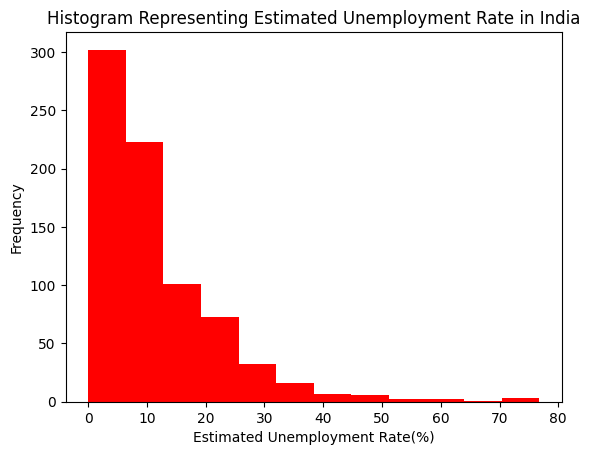

In [8]:
plt.hist(rdata[' Estimated Unemployment Rate (%)'], bins=12 ,color='red')
plt.xlabel('Estimated Unemployment Rate(%)', color='black')
plt.ylabel('Frequency', color='black')
plt.title('Histogram Representing Estimated Unemployment Rate in India')
plt.show()

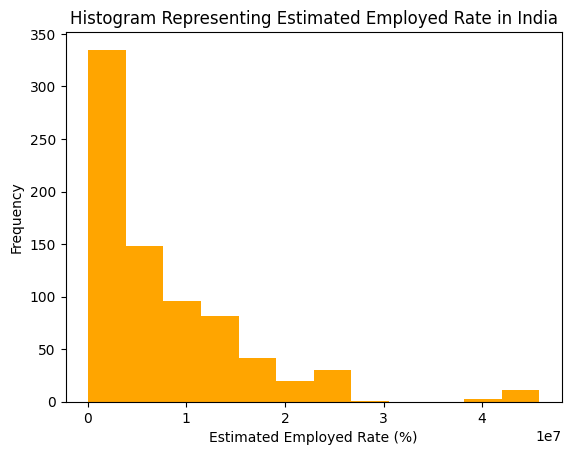

In [9]:
plt.hist(rdata[' Estimated Employed'], bins=12, color='orange')
plt.xlabel('Estimated Employed Rate (%)', color='black')
plt.ylabel('Frequency', color='black')
plt.title('Histogram Representing Estimated Employed Rate in India')
plt.show()

In [10]:
rural_count=rdata[rdata['Area']=='Rural'].value_counts().sum()

In [11]:
print('Total rural_count:', rural_count)

Total rural_count: 373


In [12]:
urban_count=rdata[rdata['Area']=='Urban'].value_counts().sum()
print('Total urban_count:', urban_count)

Total urban_count: 395


Total rural_count: 373
Total urban_count: 395


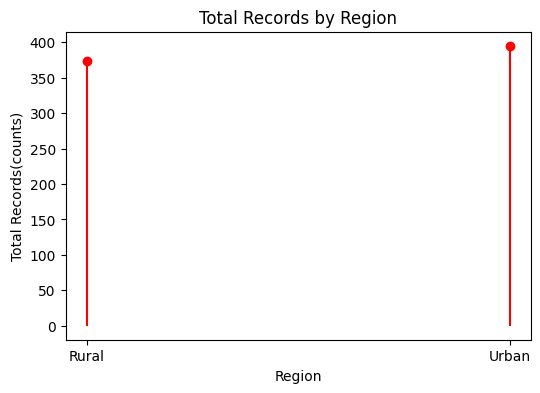

In [13]:
from itertools import count


print('Total rural_count:', rural_count)
print('Total urban_count:', urban_count)
# Prepare data for plotting
areas = ['Rural', 'Urban']
counts = [rural_count, urban_count]

# Create Lollipop chart
plt.figure(figsize=(6,4))
x = range(len(areas))
hue='counts'
plt.stem(x, counts, basefmt=" ", linefmt='red', markerfmt='o')
plt.title('Total Records by Region')
plt.xticks(ticks=x, labels=areas)
plt.xlabel('Region' ,color= 'black')
plt.ylabel('Total Records(counts)' ,color= 'black')
plt.show()

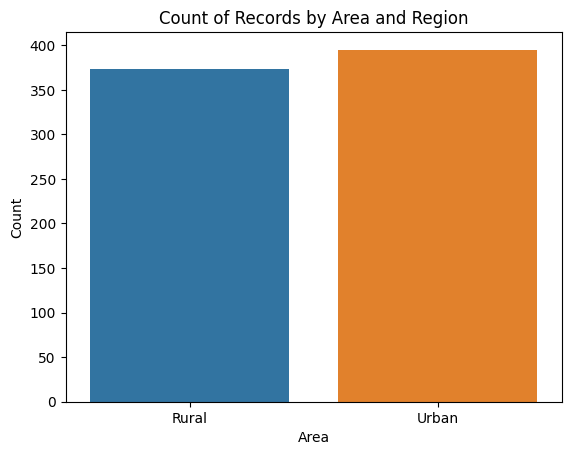

In [14]:
sns.countplot(x='Area', hue='Area', data=rdata)
plt.title('Count of Records by Area and Region')
plt.xlabel('Area', color='black')
plt.ylabel('Count', color='black')
plt.show()

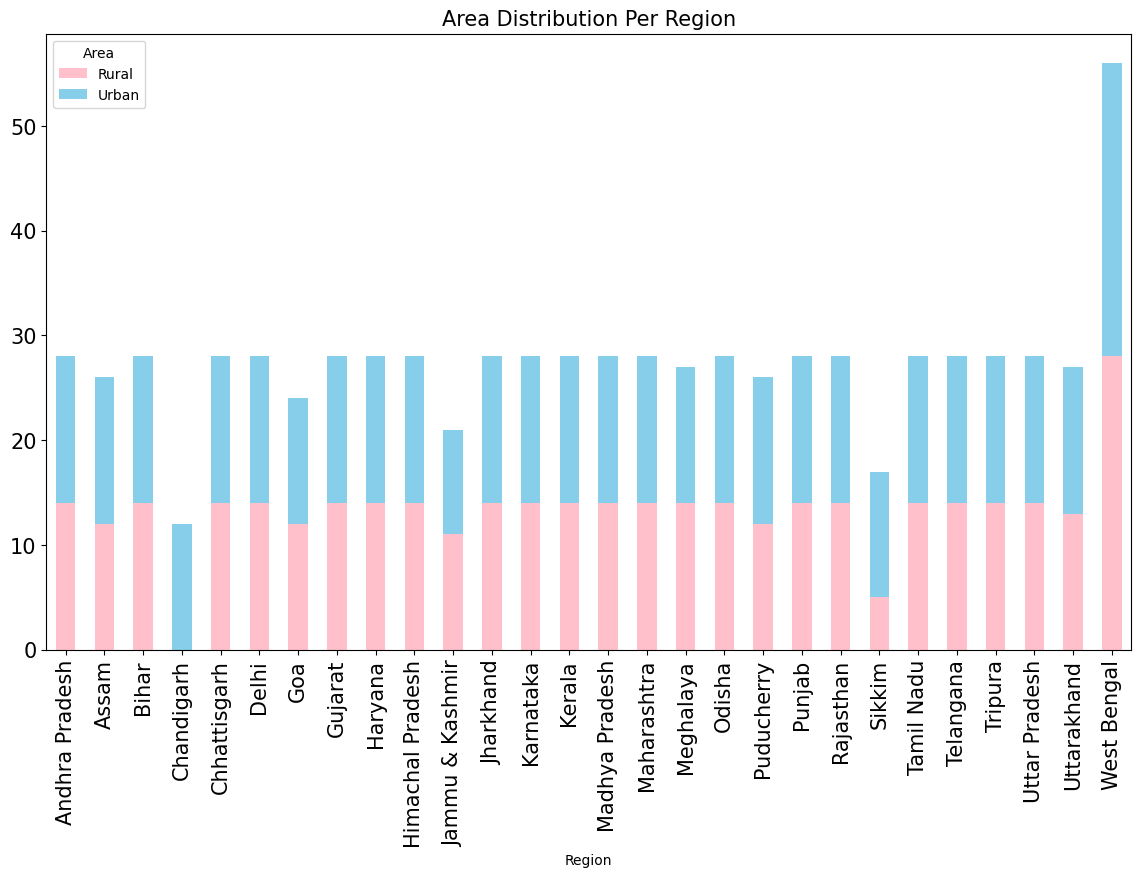

In [15]:
pd.crosstab(rdata['Region'], rdata['Area']).plot(kind='bar', stacked=True, fontsize=15, figsize=(14,8), color=['#FFC0CB', '#87CEEB', '#90EE90', '#FFA500'])
plt.title('Area Distribution Per Region', fontsize=15)
plt.show()

Text(0, 0.5, 'Count')

findfont: Font family 'bold' not found.
findfont: Font family 'bold' not found.
findfont: Font family 'bold' not found.
findfont: Font family 'bold' not found.
findfont: Font family 'bold' not found.
findfont: Font family 'bold' not found.


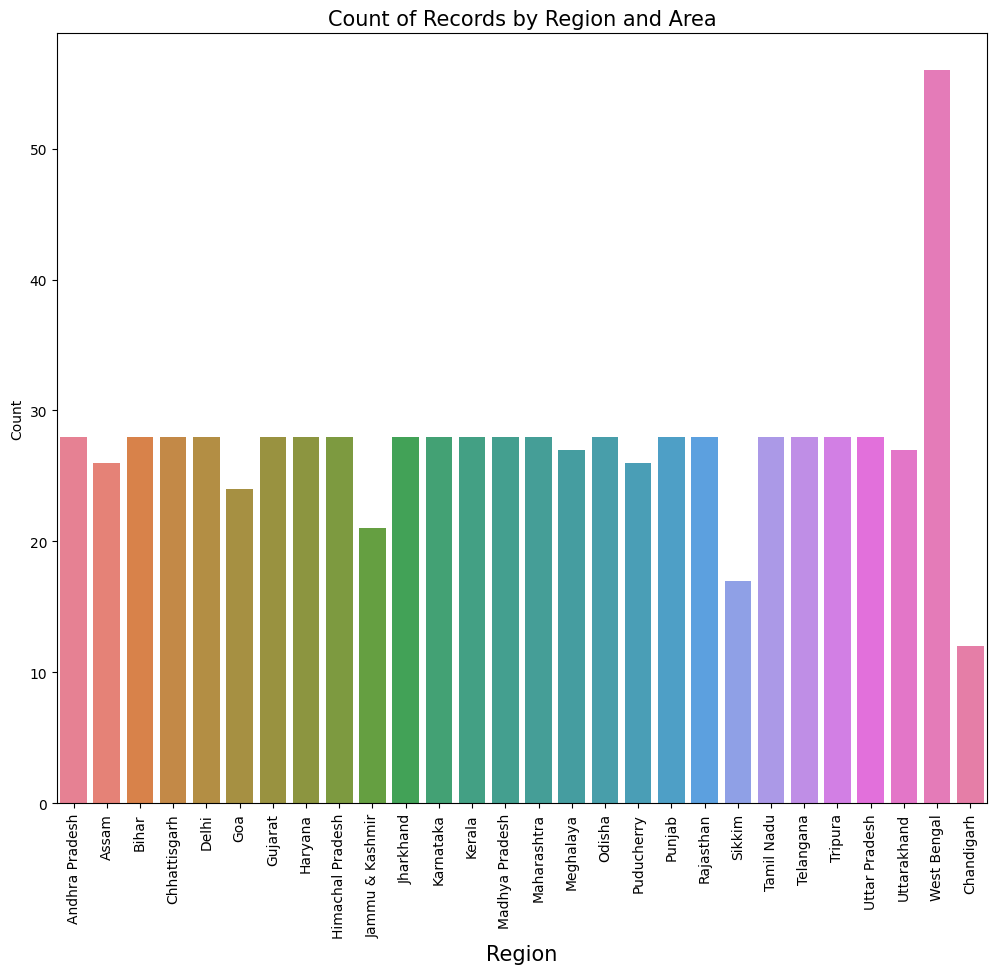

In [16]:
plt.figure(figsize=(12,10))
sns.countplot(x='Region', hue='Region', data=rdata)
plt.title('Count of Records by Region and Area', fontsize=15)
plt.xlabel('Region', color='black', fontsize=15)
plt.xticks(rotation=90) # Rotates labels by 90 degrees
plt.ylabel('Count', color='black', font='bold')